In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("Unemployment.csv")
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [7]:
df.columns = df.columns.str.strip()



In [8]:
df = df.dropna()


In [9]:
df['Date'] = pd.to_datetime(df['Date'])



/tmp/ipython-input-1436234535.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


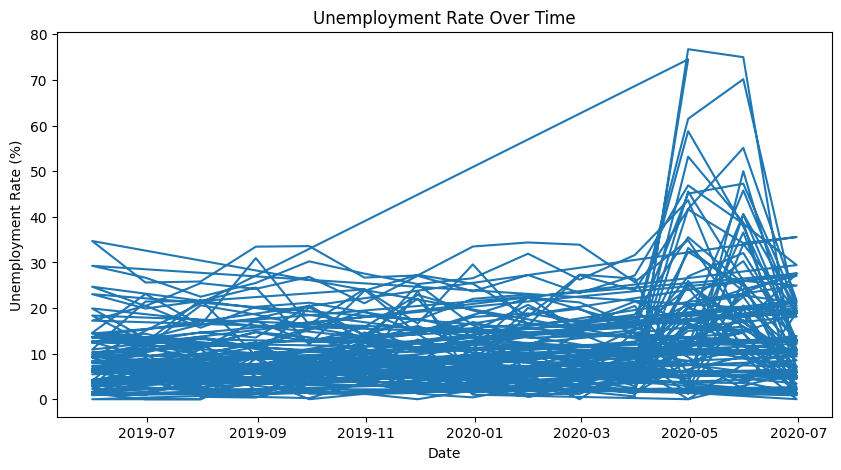

In [10]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Estimated Unemployment Rate (%)'])
plt.title("Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()


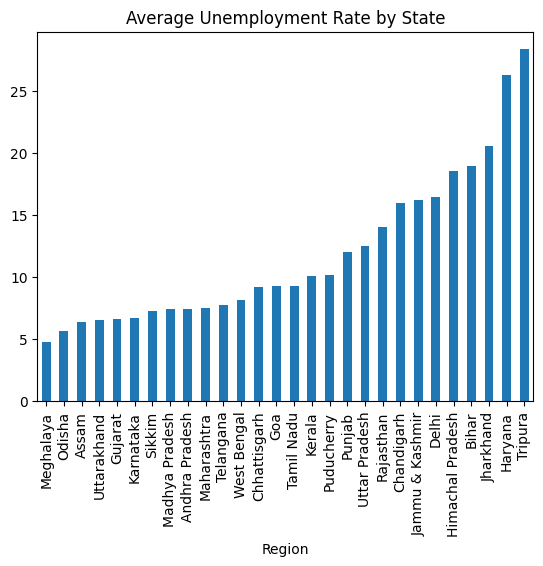

In [11]:
state_unemployment = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean()

state_unemployment.sort_values().plot(kind='bar')
plt.title("Average Unemployment Rate by State")
plt.show()


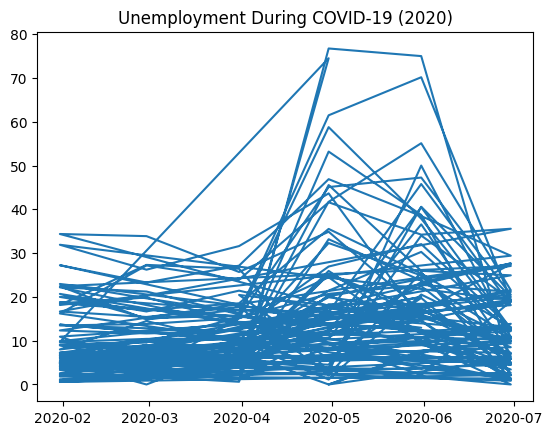

In [12]:
covid_data = df[df['Date'].dt.year == 2020]

plt.plot(covid_data['Date'], covid_data['Estimated Unemployment Rate (%)'])
plt.title("Unemployment During COVID-19 (2020)")
plt.show()


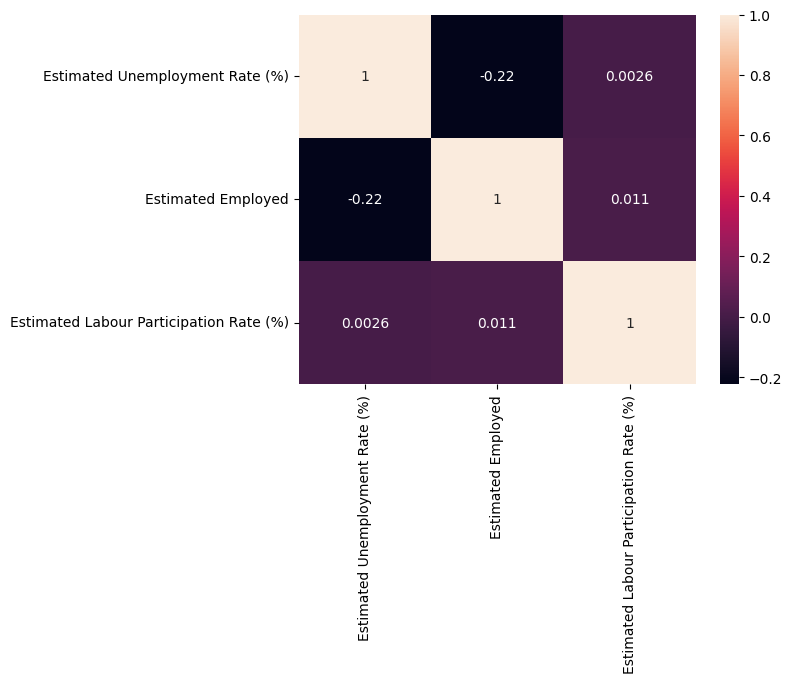

In [16]:

numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()
